In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
path = "/content/drive/MyDrive/bm/"
sys.path.append(path)

Loading MNIST dataset
Done loading MNIST
tensor([1.0000e-02, 1.0000e-03, 1.0000e-04, 1.0000e-05, 1.0000e-06, 1.0000e-07]) tensor([1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02, 3.1250e-02,
        1.5625e-02, 7.8125e-03, 3.9062e-03, 1.9531e-03, 9.7656e-04, 4.8828e-04])
False
784 500
500 500
510 2000
Validating model
False
784 500
500 500
510 2000
Validating model
False
784 500
500 500
510 2000
Validating model
False
784 500
500 500
510 2000
Validating model
False
784 500
500 500
510 2000
Validating model
False
784 500
500 500
510 2000
Validating model
False
784 500
500 500
510 2000
Validating model
False
784 500
500 500
510 2000
Validating model
False
784 500
500 500
510 2000
Validating model
False
784 500
500 500
510 2000
Validating model
False
784 500
500 500
510 2000
Validating model
False
784 500
500 500
510 2000
Validating model
False
784 500
500 500
510 2000
Validating model
False
784 500
500 500
510 2000
Validating model
False
784 500
500 500
510 2000
Validating mod

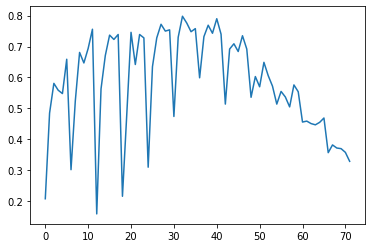

In [4]:
import numpy as np
import torch
#from keras.datasets import mnist
import matplotlib.pyplot as plt
from dbimage_torch import DBImage
plt.rcParams['image.cmap'] = 'Greys_r'

print("Loading MNIST dataset")
with open(path+'data/train_data.npy', 'rb') as f:
    train_X = torch.from_numpy(np.load(f))
with open(path+'data/train_labels.npy', 'rb') as f:
    train_labels = torch.from_numpy(np.load(f))
with open(path+'data/test_data.npy', 'rb') as f:
    test_X = torch.from_numpy(np.load(f))
with open(path+'data/test_labels.npy', 'rb') as f:
    test_labels = torch.from_numpy(np.load(f))


print("Done loading MNIST")
n_train = 10000
n_test = 1000

test_X = train_X[-n_test:,:,:].float()
train_X = train_X[:n_train,:,:].float()
test_labels = train_labels[-n_test:].float()
train_labels = train_labels[:n_train].float()

lrs = torch.arange(12)
lrs= 1/(2**lrs)
decays = torch.arange(6)
decays=torch.pow(10., -1*decays - 2)
print(decays,lrs)
base= 1.0
ls = []
ds = []
vals = []
stds = []
max_val = -1
max_l = -1 
max_decay = -1

for l in lrs:
  for d in decays:
    a = []
    for i in range(1):
      model = DBImage(28,28,10,[500,500,2000],batch_size=50,learning_rate=l,momentum=0.5,weight_decay=d,tune_rate=0.01)
      model.set_images(train_X, train_labels,split=0.95)
      model.train(30,save=False, filename=path + "models/db_")
      acc = model.validate(test_X,test_labels,filename=path+"figures/DBN/", full=False, no_print=True)
      a.append(acc)
    vals.append(torch.mean(torch.tensor(a)))
    stds.append(torch.std(torch.tensor(a)))
    ls.append(l)
    ds.append(d)

    if torch.mean(torch.tensor(a)) > max_val or max_val <0:
      max_val = torch.mean(torch.tensor(a))
      max_l = l
      max_decay = d


print("Best accuracy: ", max_val)
print("Best learning_rate: ", max_l)
print( "Best weight_decay:", max_decay)
li = []
for l in ls:
  for d in ds:
    li.append([d, l])
print(li)
print(vals)
fig, ax = plt.subplots()
ax.plot(vals)
ax.fill_between(range(len(vals)), torch.tensor(vals) - torch.tensor(stds),torch.tensor(vals) + torch.tensor(stds),alpha=0.5)
plt.show()
#model.tune(30,save=True,filename=path+"models/db_")
#model.validate(test_X,test_labels,full=False,filename=path+"figures/DBN/")


In [ ]:
print("Best accuracy: ", max_val)
print("Best parameter learning_rate:decay ", base/(2**max_l), ":", max_decay)
print("parameter combinations: " , ls,ds)
print("accuracies: ", vals)
fig, ax = plt.subplots()
ax.plot(vals)
ax.fill_between(range(len(vals)), torch.tensor(vals) - torch.tensor(stds),torch.tensor(vals) + torch.tensor(stds),alpha=0.5)
plt.show()